In [1]:
import numpy as np
from matplotlib import pyplot as plt  

In [2]:
#KKN with numpy

In [146]:
#fake data
np.random.seed(0)
n,m=90,10
df= np.vstack((np.random.normal(0,1,[n//3,m]),np.random.normal(-4,1,[n//3,m])-10,np.random.normal(4,1,[n//3,m])+10))

n,m=df.shape
print(n,m)

90 10


In [157]:
class KNN():
    def __init__(self,k,N):
        self.k=k #number of clusters
        self.N=N #iterations parameter.
          
    def fit(self,df):
        
        #random init.
        kmeans, A = self._random_init(df)
        n,m = A.shape
        
        for _ in range(self.N):
            kmeans, k_clusters = self._compute_clusters(kmeans, A)
            
        return kmeans,k_clusters,A
    
    def _random_init(self,df):
        
        #random initiation
        n,m = df.shape
        assert self.k <= n
        A = df.copy()
        np.random.shuffle(A)
        kmeans = A[0:self.k]
        return kmeans,A
    
    def _compute_clusters(self, kmeans, A):
        
        n,m = A.shape
        ## clusters generation
        dists_arr = [np.linalg.norm(row1-row2) for row1 in A for row2 in kmeans] #array of distances n,k
        dists_arr = np.asarray(dists_arr).reshape(n, self.k)
        dists = np.argmin(dists_arr, axis=1)
        #print(dists)
        ## create clusters
        k_clusters = [[] for _ in range(self.k)]
        for i,j in enumerate(dists):
            k_clusters[j].append(i)
        
        ## compute kmeans
        for i, cluster in enumerate(k_clusters):
            kmeans[i] = A[cluster, :].mean(axis=0)
        return kmeans, k_clusters
    

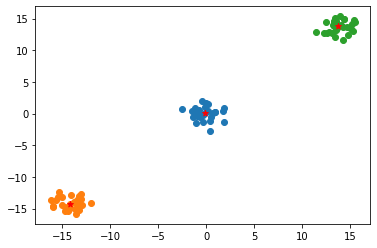

In [158]:
kmeans, k_clusters,A=KNN(3,50).fit(df)

for i,cluster in enumerate(k_clusters):
    plt.scatter(A[cluster][:,0],A[cluster][:,1])


plt.scatter(kmeans[:,0],kmeans[:,1],c="r",marker="*")